In [10]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
df = pd.read_csv("../../data_IA/venta-de-coches-sample.csv", encoding="utf8", sep = ",")
df

,company,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,phone,province,publish_date,insert_date
0,9881BCDD5A0AD4733037B3FB25E69C3A,KIA,Carnival,KIA Carnival 2.9 CRDi VGT EX 5p.,4860,4860.0,Diésel,2007,221000,185.0,5.0,Manual,Beige (champagne),8,True,VM Motor,928493782,Las Palmas,2020-12-22 13:28:36,2020-12-25 00:00:00
1,9881BCDD5A0AD4733037B3FB25E69C3A,BMW,Serie 5,BMW Serie 5 4p.,1800,NaN,Diésel,2001,205000,NaN,4.0,Manual,Verde,0,False,3F128E570B3A9009D7B52A0523AF43DD,DBB2949B54A306BA299A791B860EEBF6,Tarragona,2020-12-14 07:02:22,2020-12-26 00:00:00
2,9881BCDD5A0AD4733037B3FB25E69C3A,FIAT,500,FIAT 500 1.2 8v 51kW 69CV Lounge 3p.,6490,6490.0,Gasolina,2017,75000,69.0,3.0,Manual,Negro,7,True,LAS PALMAS MOTOR,653895468,Las Palmas,2020-11-20 18:30:00,2020-12-08 00:00:00
3,9881BCDD5A0AD4733037B3FB25E69C3A,OPEL,Astra,OPEL Astra 3p.,5550,NaN,Diésel,2009,137000,NaN,3.0,Manual,Rojo,0,False,22003DEA67E7C5BE6022A29E677668BC,67990DA67E557C1D0C1B6D1DB731938C,Barcelona,2020-11-21 16:37:13,2020-11-24 00:00:00
4,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 220 CDI AVANTGARDE 4p.,11990,11490.0,Diésel,2008,95000,170.0,4.0,Automático,Gris / Plata,21,True,Autos Lipiz,646179040,Madrid,2020-11-05 19:09:27,2020-12-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9881BCDD5A0AD4733037B3FB25E69C3A,OPEL,Corsa,OPEL Corsa 1.4 66kW 90CV Selective 5p.,10200,9400.0,Gasolina,2018,18318,90.0,5.0,Manual,Blanco (Alpino),32,True,Vara de Quart,689851902,Valencia,2020-11-23 16:24:28,2020-11-26 00:00:00
4996,9881BCDD5A0AD4733037B3FB25E69C3A,TOYOTA,Auris,TOYOTA Auris 1.2 120T Active Touring Sports 5p.,7650,NaN,Gasolina,2016,157000,116.0,5.0,Manual,Azul,5,False,9448B9C35DDD44F451DC88E988CC3A03,67ABDCB290BF2A7CA8D3E84C9007BF9A,Tarragona,2020-11-10 15:27:32,2021-01-10 00:00:00
4997,9881BCDD5A0AD4733037B3FB25E69C3A,PEUGEOT,Partner,PEUGEOT Partner 5p.,6200,NaN,Diésel,2012,125000,NaN,5.0,Manual,Blanco,0,False,92EAF3719159C372F3D50337E0A14F57,A31DAA15140D41FD522BC3DF2341D5A1,Sevilla,2020-10-10 05:51:41,2020-12-16 00:00:00
4998,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,GLC Coupé,MERCEDES-BENZ GLC Coupe GLC 220 d 4MATIC 5p.,49900,48000.0,Diésel,2019,15,170.0,5.0,Automático,Gris / Plata,11,True,Autocas Mercedes Benz,964222200,Castellón,2020-11-20 09:43:44,2020-11-28 00:00:00


In [11]:
df.columns

Index(['company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'phone', 'province', 'publish_date',
       'insert_date'],
      dtype='object')

In [12]:
df.dropna()

,company,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,phone,province,publish_date,insert_date
0,9881BCDD5A0AD4733037B3FB25E69C3A,KIA,Carnival,KIA Carnival 2.9 CRDi VGT EX 5p.,4860,4860.0,Diésel,2007,221000,185.0,5.0,Manual,Beige (champagne),8,True,VM Motor,928493782,Las Palmas,2020-12-22 13:28:36,2020-12-25 00:00:00
2,9881BCDD5A0AD4733037B3FB25E69C3A,FIAT,500,FIAT 500 1.2 8v 51kW 69CV Lounge 3p.,6490,6490.0,Gasolina,2017,75000,69.0,3.0,Manual,Negro,7,True,LAS PALMAS MOTOR,653895468,Las Palmas,2020-11-20 18:30:00,2020-12-08 00:00:00
4,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 220 CDI AVANTGARDE 4p.,11990,11490.0,Diésel,2008,95000,170.0,4.0,Automático,Gris / Plata,21,True,Autos Lipiz,646179040,Madrid,2020-11-05 19:09:27,2020-12-01 00:00:00
6,9881BCDD5A0AD4733037B3FB25E69C3A,PEUGEOT,3008,PEUGEOT 3008 1.2 PURETECH 130 HP ALLURE SS 5p.,25400,23400.0,Gasolina,2020,0,130.0,5.0,Manual,Blanco,9,True,Peugeot Beycar,681167053,Valladolid,2020-12-17 09:20:50,2021-01-02 00:00:00
13,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,Clase GLE Coupé,MERCEDES-BENZ Clase GLE Coupe MercedesAMG GLE ...,86900,84900.0,Gasolina,2017,114500,585.0,5.0,Automático,Azul (AZUL CAVANSITA - PINTURA ),20,True,Adarsa León,686938629,León,2020-11-13 10:05:54,2020-11-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,9881BCDD5A0AD4733037B3FB25E69C3A,VOLKSWAGEN,Polo,VOLKSWAGEN Polo APolo 1.0 75CV BMT 5p.,8399,7663.0,Gasolina,2016,67191,75.0,5.0,Manual,Blanco,21,True,Autohero,936289546,Barcelona,2020-12-11 17:17:40,2020-12-12 00:00:00
4991,9881BCDD5A0AD4733037B3FB25E69C3A,AUDI,A4 Allroad Quattro,AUDI A4 Allroad Quattro 2.0 TFSI 211cv 5p.,16900,16900.0,Gasolina,2011,130000,211.0,5.0,Manual,Negro,9,True,HGP Motors,937648907,Barcelona,2021-01-13 16:19:40,2021-01-14 00:00:00
4992,9881BCDD5A0AD4733037B3FB25E69C3A,BMW,X3,BMW X3 sDrive18d 5p.,17800,17800.0,Diésel,2013,63794,143.0,5.0,Manual,300 Alpinweib (sÃ³lido),39,True,Ocasion Plus,876500593,Zaragoza,2020-12-07 13:45:49,2020-12-10 00:00:00
4995,9881BCDD5A0AD4733037B3FB25E69C3A,OPEL,Corsa,OPEL Corsa 1.4 66kW 90CV Selective 5p.,10200,9400.0,Gasolina,2018,18318,90.0,5.0,Manual,Blanco (Alpino),32,True,Vara de Quart,689851902,Valencia,2020-11-23 16:24:28,2020-11-26 00:00:00


In [13]:
df

,company,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,phone,province,publish_date,insert_date
0,9881BCDD5A0AD4733037B3FB25E69C3A,KIA,Carnival,KIA Carnival 2.9 CRDi VGT EX 5p.,4860,4860.0,Diésel,2007,221000,185.0,5.0,Manual,Beige (champagne),8,True,VM Motor,928493782,Las Palmas,2020-12-22 13:28:36,2020-12-25 00:00:00
1,9881BCDD5A0AD4733037B3FB25E69C3A,BMW,Serie 5,BMW Serie 5 4p.,1800,NaN,Diésel,2001,205000,NaN,4.0,Manual,Verde,0,False,3F128E570B3A9009D7B52A0523AF43DD,DBB2949B54A306BA299A791B860EEBF6,Tarragona,2020-12-14 07:02:22,2020-12-26 00:00:00
2,9881BCDD5A0AD4733037B3FB25E69C3A,FIAT,500,FIAT 500 1.2 8v 51kW 69CV Lounge 3p.,6490,6490.0,Gasolina,2017,75000,69.0,3.0,Manual,Negro,7,True,LAS PALMAS MOTOR,653895468,Las Palmas,2020-11-20 18:30:00,2020-12-08 00:00:00
3,9881BCDD5A0AD4733037B3FB25E69C3A,OPEL,Astra,OPEL Astra 3p.,5550,NaN,Diésel,2009,137000,NaN,3.0,Manual,Rojo,0,False,22003DEA67E7C5BE6022A29E677668BC,67990DA67E557C1D0C1B6D1DB731938C,Barcelona,2020-11-21 16:37:13,2020-11-24 00:00:00
4,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 220 CDI AVANTGARDE 4p.,11990,11490.0,Diésel,2008,95000,170.0,4.0,Automático,Gris / Plata,21,True,Autos Lipiz,646179040,Madrid,2020-11-05 19:09:27,2020-12-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9881BCDD5A0AD4733037B3FB25E69C3A,OPEL,Corsa,OPEL Corsa 1.4 66kW 90CV Selective 5p.,10200,9400.0,Gasolina,2018,18318,90.0,5.0,Manual,Blanco (Alpino),32,True,Vara de Quart,689851902,Valencia,2020-11-23 16:24:28,2020-11-26 00:00:00
4996,9881BCDD5A0AD4733037B3FB25E69C3A,TOYOTA,Auris,TOYOTA Auris 1.2 120T Active Touring Sports 5p.,7650,NaN,Gasolina,2016,157000,116.0,5.0,Manual,Azul,5,False,9448B9C35DDD44F451DC88E988CC3A03,67ABDCB290BF2A7CA8D3E84C9007BF9A,Tarragona,2020-11-10 15:27:32,2021-01-10 00:00:00
4997,9881BCDD5A0AD4733037B3FB25E69C3A,PEUGEOT,Partner,PEUGEOT Partner 5p.,6200,NaN,Diésel,2012,125000,NaN,5.0,Manual,Blanco,0,False,92EAF3719159C372F3D50337E0A14F57,A31DAA15140D41FD522BC3DF2341D5A1,Sevilla,2020-10-10 05:51:41,2020-12-16 00:00:00
4998,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,GLC Coupé,MERCEDES-BENZ GLC Coupe GLC 220 d 4MATIC 5p.,49900,48000.0,Diésel,2019,15,170.0,5.0,Automático,Gris / Plata,11,True,Autocas Mercedes Benz,964222200,Castellón,2020-11-20 09:43:44,2020-11-28 00:00:00


In [14]:
retail = df.copy()

In [15]:
retail

,company,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,phone,province,publish_date,insert_date
0,9881BCDD5A0AD4733037B3FB25E69C3A,KIA,Carnival,KIA Carnival 2.9 CRDi VGT EX 5p.,4860,4860.0,Diésel,2007,221000,185.0,5.0,Manual,Beige (champagne),8,True,VM Motor,928493782,Las Palmas,2020-12-22 13:28:36,2020-12-25 00:00:00
1,9881BCDD5A0AD4733037B3FB25E69C3A,BMW,Serie 5,BMW Serie 5 4p.,1800,NaN,Diésel,2001,205000,NaN,4.0,Manual,Verde,0,False,3F128E570B3A9009D7B52A0523AF43DD,DBB2949B54A306BA299A791B860EEBF6,Tarragona,2020-12-14 07:02:22,2020-12-26 00:00:00
2,9881BCDD5A0AD4733037B3FB25E69C3A,FIAT,500,FIAT 500 1.2 8v 51kW 69CV Lounge 3p.,6490,6490.0,Gasolina,2017,75000,69.0,3.0,Manual,Negro,7,True,LAS PALMAS MOTOR,653895468,Las Palmas,2020-11-20 18:30:00,2020-12-08 00:00:00
3,9881BCDD5A0AD4733037B3FB25E69C3A,OPEL,Astra,OPEL Astra 3p.,5550,NaN,Diésel,2009,137000,NaN,3.0,Manual,Rojo,0,False,22003DEA67E7C5BE6022A29E677668BC,67990DA67E557C1D0C1B6D1DB731938C,Barcelona,2020-11-21 16:37:13,2020-11-24 00:00:00
4,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 220 CDI AVANTGARDE 4p.,11990,11490.0,Diésel,2008,95000,170.0,4.0,Automático,Gris / Plata,21,True,Autos Lipiz,646179040,Madrid,2020-11-05 19:09:27,2020-12-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9881BCDD5A0AD4733037B3FB25E69C3A,OPEL,Corsa,OPEL Corsa 1.4 66kW 90CV Selective 5p.,10200,9400.0,Gasolina,2018,18318,90.0,5.0,Manual,Blanco (Alpino),32,True,Vara de Quart,689851902,Valencia,2020-11-23 16:24:28,2020-11-26 00:00:00
4996,9881BCDD5A0AD4733037B3FB25E69C3A,TOYOTA,Auris,TOYOTA Auris 1.2 120T Active Touring Sports 5p.,7650,NaN,Gasolina,2016,157000,116.0,5.0,Manual,Azul,5,False,9448B9C35DDD44F451DC88E988CC3A03,67ABDCB290BF2A7CA8D3E84C9007BF9A,Tarragona,2020-11-10 15:27:32,2021-01-10 00:00:00
4997,9881BCDD5A0AD4733037B3FB25E69C3A,PEUGEOT,Partner,PEUGEOT Partner 5p.,6200,NaN,Diésel,2012,125000,NaN,5.0,Manual,Blanco,0,False,92EAF3719159C372F3D50337E0A14F57,A31DAA15140D41FD522BC3DF2341D5A1,Sevilla,2020-10-10 05:51:41,2020-12-16 00:00:00
4998,9881BCDD5A0AD4733037B3FB25E69C3A,MERCEDES-BENZ,GLC Coupé,MERCEDES-BENZ GLC Coupe GLC 220 d 4MATIC 5p.,49900,48000.0,Diésel,2019,15,170.0,5.0,Automático,Gris / Plata,11,True,Autocas Mercedes Benz,964222200,Castellón,2020-11-20 09:43:44,2020-11-28 00:00:00


In [16]:
df['make'].items

<bound method Series.items of 0                 KIA
1                 BMW
2                FIAT
3                OPEL
4       MERCEDES-BENZ
            ...      
4995             OPEL
4996           TOYOTA
4997          PEUGEOT
4998    MERCEDES-BENZ
4999    MERCEDES-BENZ
Name: make, Length: 5000, dtype: object>

In [17]:
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

import squarify
import matplotlib.pyplot as plt
%matplotlib inline

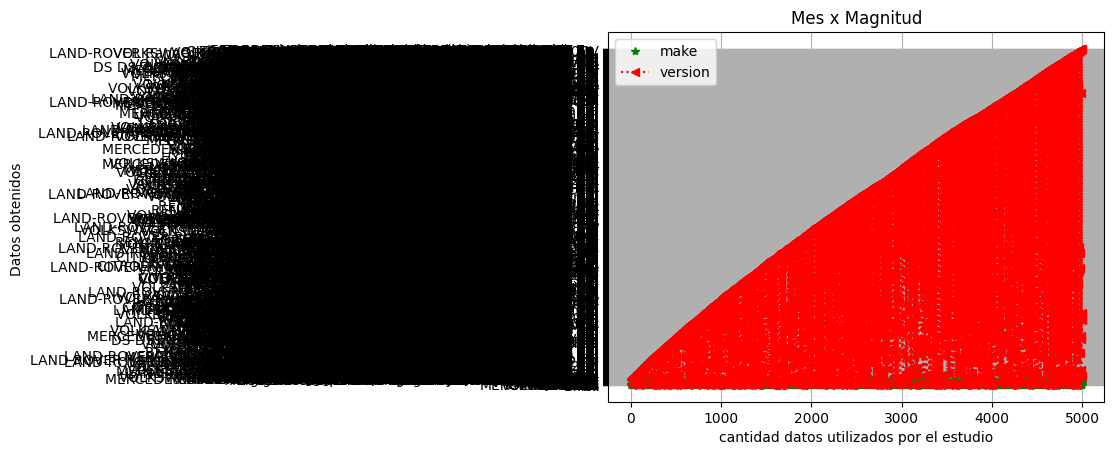

In [18]:
#ejex = np.arange(0,10000)
marca = df["make"]
Version = df["version"]

plt.plot(marca,label = "make", color = "green", marker = "*", linestyle = "")
plt.plot(Version, label= "version", color = "red", marker = "<", linestyle = ":")
plt.title("Mes x Magnitud")
#etiqueta para ejes
plt.xlabel("cantidad datos utilizados por el estudio")
plt.ylabel("Datos obtenidos ")
#personalizar ejes:
#plt.xticks(np.arange(0, 10001, 1000)
#activar cuadricula
plt.legend()
plt.grid()
plt.show()